Summary: Follow Nogcs regression steps
1) trim the 5% quantiles
2) plot grid time vs reported time
3) (include delta x and delta y)
4) 4.44 + .3 x (check your answer later)
5) log-log transform data? (make sure residuals are constant)
6) 


Questions for David: 
* Radio_Name can you explain this again which should I remove?

Ngocs code

rm(list = ls())
setwd("/home/ngoc/gitfolders/students/ems")

data <- read.csv("peakhours.csv",header=T)
data$transport_time <- data$transport_time/60
subset <- data[data$transport_time < 60 & data$transport_time > 1 & data$grid_time  > 0.1,]
subset$grid_time <- subset$grid_time/60
model <- lm(transport_time ~ grid_time,data=subset)
summary(model)
par(mfrow = c(2,2))
plot(model)
model <- lm(log(transport_time) ~ log(grid_time),data=subset)
summary(model)
plot(model)

In [1]:
import csv
import collections
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [2]:
peakHours = (np.genfromtxt("../Output_Data/austin_data_3200/austin_test_calls_v4.csv", delimiter=",", dtype = str))
#peakHours = (np.genfromtxt("../Output_Data/peakhours.csv", delimiter=",", dtype = str))
clean = np.genfromtxt('../Input_Data/cleaned_data.csv', delimiter=",", dtype=str) #210k x 17

In [3]:
"""It looks like I filter out 70/190 radio names in my peak hour data"""
# unique_entry = []
# for i in range(len(peakHours[:,2])):
#     if(peakHours[i,2] not in unique_entry):
#         unique_entry.append(peakHours[i,2])
# print(len(unique_entry))

'It looks like I filter out 70/190 radio names in my peak hour data'

In [4]:
peakHours[0]

array(['interarrival_seconds', 'neighborhood', 'dow', 'transport_time',
       'Longitude_Of_Emergency', 'Latitude_Of_Emergency',
       'Longitude_At_Assign_Time', 'Latitude_At_Assign_Time', 'grid_time',
       'stn1_min', 'stn2_min', 'stn3_min', 'stn4_min', 'stn5_min',
       'stn6_min', 'stn7_min', 'stn8_min', 'stn9_min', 'stn10_min',
       'stn11_min', 'stn12_min', 'stn13_min', 'stn14_min', 'stn15_min',
       'stn16_min', 'stn17_min', 'stn18_min', 'stn19_min', 'stn20_min',
       'stn21_min', 'stn22_min', 'stn23_min', 'stn24_min', 'stn25_min',
       'stn26_min', 'stn27_min', 'stn28_min', 'stn29_min', 'stn30_min',
       'stn31_min', 'stn32_min', 'stn33_min', 'stn34_min', 'stn35_min',
       'stn36_min', 'stn37_min', 'stn38_min', 'stn39_min', 'stn40_min',
       'stn41_min', 'stn42_min', 'stn43_min', 'stn44_min', 'hosp1_min',
       'hosp2_min', 'hosp3_min', 'hosp4_min', 'hosp5_min', 'hosp6_min',
       'hosp7_min', 'hosp8_min', 'hosp9_min', 'hosp10_min', 'hosp11_min',
       'ho

In [5]:
print(peakHours[0,3]) #transport_time
print(peakHours[0,4]) #Longitude_Of_Emergency
print(peakHours[0,5]) #Latitude_Of_Emergency
print(peakHours[0,6]) #Longitude_At_Assign_Time
print(peakHours[0,7]) #Latitude_At_Assign_Time
print(peakHours[0,8]) #Grid_time
# print(peakHours[0,3]) #Longitude_At_Assign_Time #-97
# print(peakHours[0,4]) #Latitude_At_Assign_Time #30
# print(peakHours[0,5]) #Time_Assigned
# print(peakHours[0,6]) #Time_Enroute
# print(peakHours[0,7]) #Time_ArrivedAtScene
# print(peakHours[0,8]) #Time_Depart_Scene
# print(peakHours[0,9]) #Time_Arrive_Destination
# print(peakHours[0,10]) #Time_Available
# print(peakHours[0,11]) #Time_Call_Cleared
# print(peakHours[0,13]) #Longitude_Of_Emergency
# print(peakHours[0,14]) #Latitude_Of_Emergency
# print(peakHours[0,15]) #travel_time
# print(peakHours[0,16]) #grid_time

transport_time
Longitude_Of_Emergency
Latitude_Of_Emergency
Longitude_At_Assign_Time
Latitude_At_Assign_Time
grid_time


In [6]:
#nobs # of observations;
#what is skew? https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85
print("report time")
print(stats.describe(np.array(peakHours[1:,15]).astype(float)))
print("grid time")
print(stats.describe(np.array(peakHours[1:,16]).astype(float)))

report time
DescribeResult(nobs=30104, minmax=(136.09, 6116.14), mean=2202.79463501528, variance=211891.62360100477, skewness=-1.1516671220684944, kurtosis=4.3686324925796205)
grid time
DescribeResult(nobs=30104, minmax=(127.81, 6617.87), mean=950.2921407454157, variance=256818.79871623308, skewness=1.5134119298316893, kurtosis=5.4148474205277)


### 1) trim the 5% quantiles

In [7]:
#lets remove some quantile data
report_time = np.array(peakHours[1:,15]).astype(float)
report_time = report_time/60
grid_time = np.array(peakHours[1:,16]).astype(float)
grid_time = grid_time / 60

print(np.quantile(grid_time,.99)) #32.4 * 60 seconds
print(np.quantile(grid_time,.05)) #0 * 60 seconds
print(np.quantile(report_time,.05)) #1 * 60 seconds
print(np.quantile(report_time,.99)) #25 hmmm * 60 seconds

42.20161500000027
5.0
23.625166666666665
53.48733333333333


In [8]:
#PEAKHOURS VERSION
report_time = np.array(peakHours[1:,15]).astype(float)
report_time = report_time/60
grid_time = np.array(peakHours[1:,16]).astype(float)
grid_time = grid_time / 60
#subset <- data[data$transport_time < 60 & data$transport_time > 1 & data$grid_time  > 0.1,]
print(report_time.shape)
# print("filter_1:  " + str(len(np.where(grid_time > (32.4*60))[0])))
# filter_ind = np.where(grid_time < (32.4*60))
# grid_time = grid_time[filter_ind]
# report_time = report_time[filter_ind]
print("filter_2:  " + str(len(np.where(grid_time <= 0)[0])))
filter_ind = np.where(grid_time > 0.1)
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print("filter_3:  " + str(len(np.where(report_time > 60)[0])))
filter_ind = np.where(report_time <= (60))
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print("filter_4:  " + str(len(np.where(report_time <= 1)[0])))
filter_ind = np.where(report_time > 1)
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print(report_time.shape)
#I remember this was significantly less work for Ngoc. Maybe I should try pandas

(30104,)
filter_2:  0
filter_3:  80
filter_4:  0
(30024,)


In [9]:
# #AUSTIN TEST CALLS VERSION
report_time = np.array(peakHours[1:,3]).astype(float)
report_time = report_time/60
grid_time = np.array(peakHours[1:,8]).astype(float)
grid_time = grid_time / 60
#subset <- data[data$transport_time < 60 & data$transport_time > 1 & data$grid_time  > 0.1,]
print(report_time.shape)
# print("filter_1:  " + str(len(np.where(grid_time > (32.4*60))[0])))
# filter_ind = np.where(grid_time < (32.4*60))
# grid_time = grid_time[filter_ind]
# report_time = report_time[filter_ind]
print("filter_2:  " + str(len(np.where(grid_time <= 0)[0])))
filter_ind = np.where(grid_time > 0.1)
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print("filter_3:  " + str(len(np.where(report_time > 45)[0])))
filter_ind = np.where(report_time <= (60))
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print("filter_4:  " + str(len(np.where(report_time <= 1)[0])))
filter_ind = np.where(report_time > 1)
grid_time = grid_time[filter_ind]
report_time = report_time[filter_ind]
print(report_time.shape)
#I remember this was significantly less work for Ngoc. Maybe I should try pandas

(30104,)
filter_2:  2632
filter_3:  119
filter_4:  282
(27138,)


### 5) log-log transform data? (make sure residuals are constant)

slope:: 0.1430919014731839 intercept:: 5.391695615423912 r2_value::0.04703393979677209


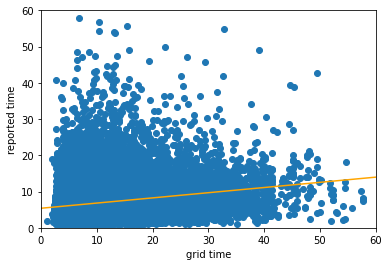

In [10]:
#linear regression on time slots
slope, intercept, r_value, p_value, std_err = stats.linregress(grid_time,report_time)

x = np.linspace(0, 4000, num=50)
y = slope * np.linspace(0, 4000, num=50) + intercept
plt.plot(x,y, 'orange')
plt.scatter(grid_time, report_time)
plt.ylim([0,60])
plt.xlim([0,60])
plt.xlabel("grid time")
plt.ylabel("reported time")
#print("r-squared:", r_value**2)
print("slope:: " + str(slope) + " intercept:: " + str(intercept) + " r2_value::" + str(r_value**2))

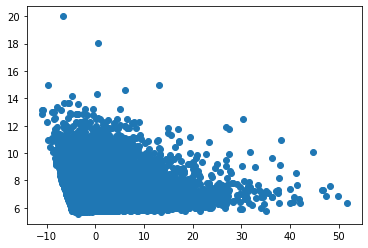

In [11]:
#plot residuals
#use R in python https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/lin_reg/
slope = 0.1430919014731839
intercept = 5.391695615423912
y_pred = np.zeros(report_time.shape)
for i in range(len(report_time)):
    ax = grid_time[i]*slope
    y_pred[i] = ax + intercept
residuals = report_time - y_pred
plt.scatter(residuals,y_pred)
#this also looks fine..?

slope:: 0.4011478655815724 intercept:: 1.0469242277715907 r2_value::0.1472181518571825


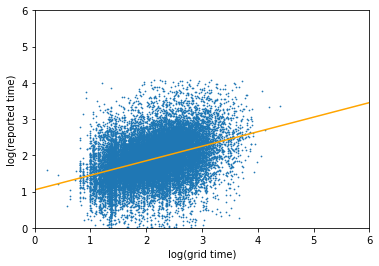

In [8]:
#linear regression on time slots
log_report_time =(np.log(report_time))
log_grid_time =(np.log(grid_time))
slope, intercept, r_value, p_value, std_err = stats.linregress(log_grid_time,log_report_time)
x = np.linspace(0, 4000, num=50)
y = slope * np.linspace(0, 4000, num=50) + intercept
plt.plot(x,y, 'orange')
plt.scatter(log_grid_time, log_report_time, s = 0.5)
plt.ylim([0,6])
plt.xlim([0,6])
plt.xlabel("log(grid time)")
plt.ylabel("log(reported time)")
print("slope:: " + str(slope) + " intercept:: " + str(intercept) + " r2_value::" + str(r_value**2))

In [14]:
grid_time[0]

3.712

Text(0, 0.5, 'grid time adjusted')

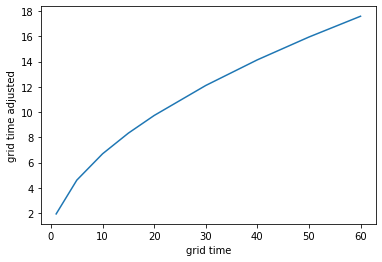

In [10]:
#example
#slope:: 0.23868463365149437 intercept:: 1.261777659720721
slope= 0.4011478655815724 #test calls
intercept= 1.0469242277715907 #test calls
slope = 0.53868463365149437  #peakhours
intercept = .661777659720721 #peakhours
source = np.array([1,5,10,15,20,30,40,50,60])
ax = np.log(source)*slope
sink = np.exp(ax + intercept)
sink
plt.plot(source,sink)
plt.xlabel("grid time")
plt.ylabel("grid time adjusted")

In [11]:
sink

array([ 1.9382348 ,  4.6124406 ,  6.70025019,  8.33582666,  9.7331015 ,
       12.10901753, 14.1387653 , 15.94466578, 17.59013371])

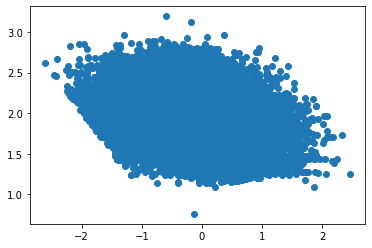

In [65]:
#plot residuals
#use R in python https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/lin_reg/
slope = 0.23868463365149437  #peakhours
slope = 0.53868463365149437  #peakhours
intercept = 1.261777659720721 #peakhours
intercept = .701777659720721 #peakhours
grid_time_adjusted = np.zeros(report_time.shape)
for i in range(len(report_time)):
    ax = np.log(grid_time[i])*slope
    grid_time_adjusted[i] = np.exp(ax + intercept)
    
y_pred = np.log(grid_time_adjusted)
residuals = np.log(report_time) - y_pred
plt.scatter(residuals,y_pred)

In [66]:
print(np.mean(report_time))
print(np.mean(grid_time))
print(np.mean(grid_time_adjusted))

6.941021939085501
10.827491337460073
7.032646294459334


Text(0.5, 0, 'response time')

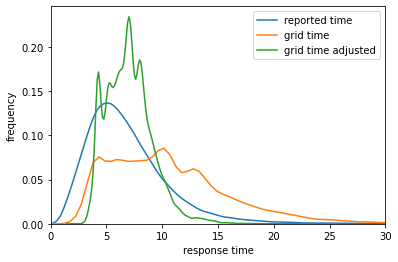

In [67]:
sns.kdeplot(report_time)
sns.kdeplot(grid_time)
sns.kdeplot(grid_time_adjusted)
plt.xlim([0,30])
plt.legend(['reported time', 'grid time', 'grid time adjusted'])
plt.ylabel('frequency')
plt.xlabel('response time')

(array([7.380e+02, 1.280e+03, 2.070e+03, 2.819e+03, 3.518e+03, 4.111e+03,
        4.498e+03, 4.320e+03, 4.134e+03, 3.804e+03, 3.541e+03, 3.169e+03,
        2.791e+03, 2.417e+03, 2.032e+03, 1.631e+03, 1.441e+03, 1.174e+03,
        9.810e+02, 7.890e+02, 6.610e+02, 5.020e+02, 4.070e+02, 4.010e+02,
        2.920e+02, 2.440e+02, 2.120e+02, 1.860e+02, 1.490e+02, 1.330e+02,
        1.160e+02, 1.020e+02, 7.000e+01, 6.400e+01, 7.300e+01, 5.300e+01,
        5.100e+01, 3.400e+01, 3.200e+01, 2.500e+01, 2.700e+01, 2.400e+01,
        2.300e+01, 2.400e+01, 1.900e+01, 2.100e+01, 9.000e+00, 1.500e+01,
        1.800e+01, 1.600e+01, 1.600e+01, 7.000e+00, 9.000e+00, 5.000e+00,
        6.000e+00, 9.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 4.000e+00,
        3.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+0

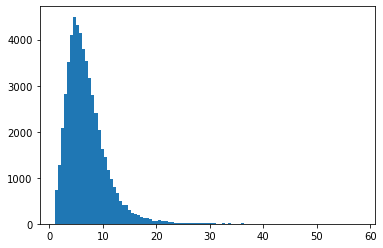

In [18]:
plt.hist(report_time, bins = 100)

(array([3.000e+00, 5.760e+02, 4.280e+03, 4.052e+03, 4.005e+03, 4.023e+03,
        3.731e+03, 3.542e+03, 5.229e+03, 4.882e+03, 2.342e+03, 3.929e+03,
        3.022e+03, 1.761e+03, 2.061e+03, 1.470e+03, 1.193e+03, 8.830e+02,
        7.800e+02, 6.990e+02, 5.660e+02, 4.240e+02, 2.370e+02, 2.750e+02,
        2.370e+02, 1.400e+02, 1.260e+02, 1.060e+02, 6.400e+01, 7.600e+01,
        9.600e+01, 7.400e+01, 7.600e+01, 7.000e+01, 5.200e+01, 5.400e+01,
        4.400e+01, 2.900e+01, 4.800e+01, 3.600e+01, 9.000e+00, 7.000e+00,
        1.300e+01, 2.000e+01, 9.000e+00, 4.000e+00, 1.500e+01, 7.000e+00,
        5.000e+00, 0.000e+00, 9.000e+00, 2.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

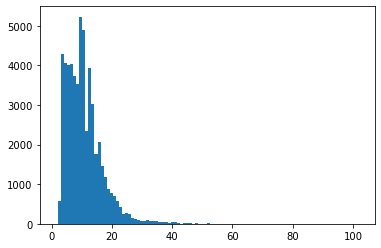

In [19]:
plt.hist(grid_time,bins = 100)